# Classifying Cervical Cancer

In this competition we have a multi-class classification problem with three classes. We are asked, given an image, to identify the cervix type.

From the data description:

In this competition, you will develop algorithms to correctly classify cervix types based on cervical images. These different types of cervix in our data set are all considered normal (not cancerous), but since the transformation zones aren't always visible, some of the patients require further testing while some don't. This decision is very important for the healthcare provider and critical for the patient. Identifying the transformation zones is not an easy task for the healthcare providers, therefore, an algorithm-aided decision will significantly improve the quality and efficiency of cervical cancer screening for these patients.

The submission format is asking for a probability for each of the three different cervix types.

In [1]:
from skimage.io import imread, imshow
import cv2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from glob import glob
basepath = 'data/train/'

all_cervix_images = []

for path in sorted(glob(basepath + "*")):
    cervix_type = path.split("/")[-1]
    cervix_images = sorted(glob(basepath + cervix_type + "/*"))
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,data/train/Type_1/0.jpg,jpg,Type_1
1,data/train/Type_1/10.jpg,jpg,Type_1
2,data/train/Type_1/1013.jpg,jpg,Type_1
3,data/train/Type_1/1014.jpg,jpg,Type_1
4,data/train/Type_1/1019.jpg,jpg,Type_1


We have a total of 1481 images in the whole dataset


/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


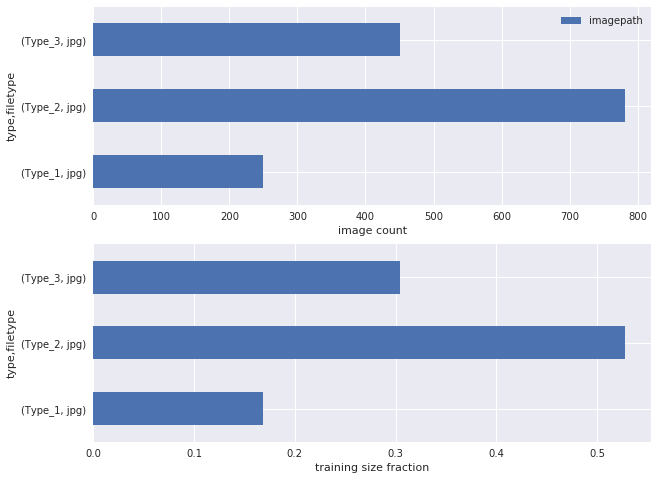

In [3]:
print('We have a total of {} images in the whole dataset'.format(all_cervix_images.shape[0]))
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/all_cervix_images.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anacond

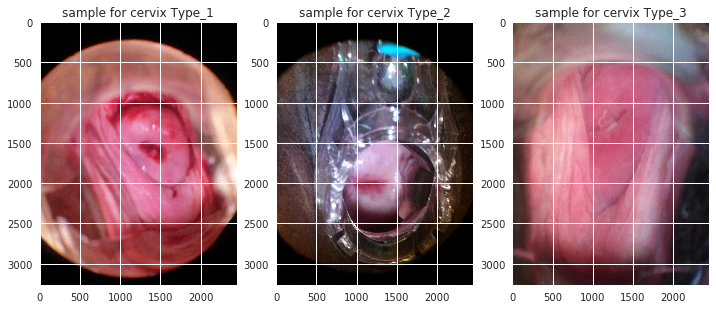

In [4]:
fig = plt.figure(figsize=(12,8))

i = 1
for t in all_cervix_images['type'].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
    plt.imshow(plt.imread(f))
    plt.title('sample for cervix {}'.format(t))

In [5]:
from collections import defaultdict

images = defaultdict(list)

for t in all_cervix_images['type'].unique():
    sample_counter = 0
    for _, row in all_cervix_images[all_cervix_images['type'] == t].iterrows():
        #print('reading image {}'.format(row.imagepath))
        try:
            img = imread(row.imagepath)
            sample_counter +=1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.imagepath))
        if sample_counter > 35:
            break

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anacond

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 748421120 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 219021312 bytes but only got 14762. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 495583232 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 10704. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/pa

In [6]:
dfs = []
for t in all_cervix_images['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size().reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped

,nchans,ncols,nrows,type,0
3,3,2448,3264,Type_3,28
6,3,3096,4128,Type_3,7
7,3,3264,2448,Type_3,1
5,3,3096,4128,Type_2,18
2,3,2448,3264,Type_2,17
8,3,4128,3096,Type_2,1
1,3,2448,3264,Type_1,18
4,3,3096,4128,Type_1,17
0,3,2322,4128,Type_1,1


/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


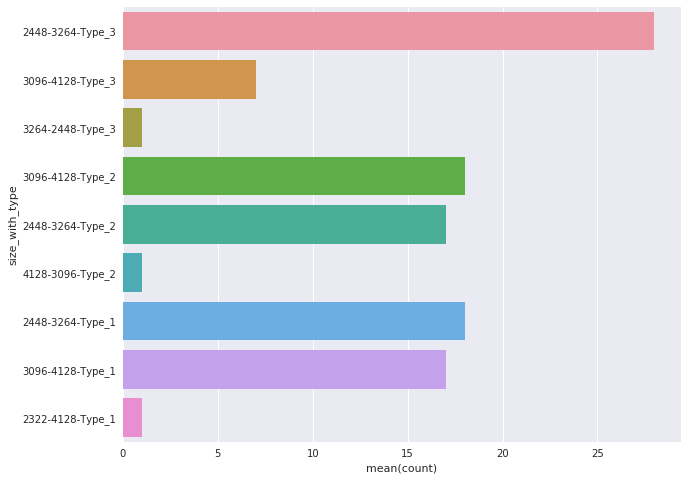

In [7]:
shapes_df_grouped['size_with_type'] = shapes_df_grouped.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)
shapes_df_grouped['count'] = shapes_df_grouped[[0]]

plt.figure(figsize=(10,8))
#shapes_df_grouped['count'].plot.barh(figsize=(10,8))
sns.barplot(x="count", y="size_with_type", data=shapes_df_grouped)

# Image neighbourhood

In [9]:
import numpy as np

In [10]:
def transform_image(img, rescaled_dim, to_gray=False):
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))

    return timg/np.linalg.norm(timg)

rescaled_dim = 100

all_images = []
all_image_types = []

for t in all_cervix_images['type'].unique():
    all_images = all_images + images[t]
    all_image_types = all_image_types + len(images[t])*[t]

# - normalize each uint8 image to the value interval [0, 1] as float image
# - rgb to gray
# - downsample image to rescaled_dim X rescaled_dim
# - L2 norm of each sample = 1
gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_image_types = np.array(all_image_types)
gray_imgs_mat.shape, all_image_types.shape

((108, 30000), (108,))

In [11]:
from scipy.spatial.distance import pdist, squareform

sq_dists = squareform(pdist(gray_imgs_mat))

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


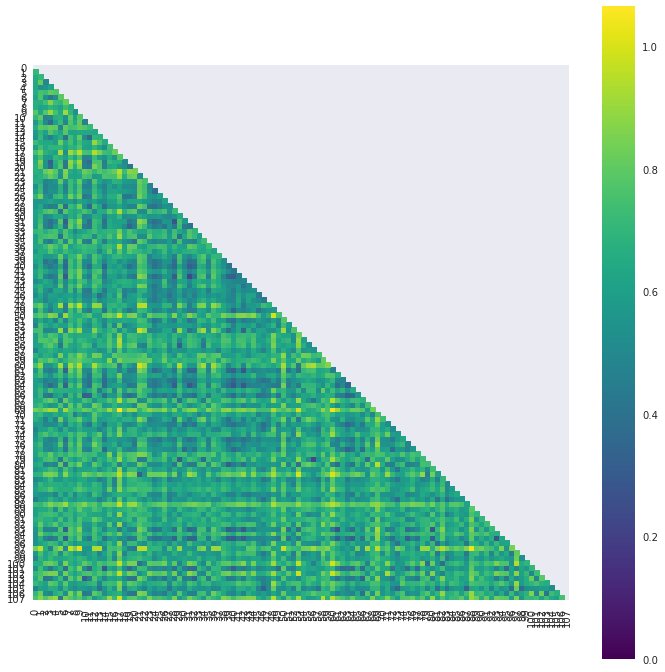

In [12]:
mask = np.zeros_like(sq_dists, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
sns.heatmap(sq_dists, cmap=plt.get_cmap('viridis'), square=True, mask=mask)

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


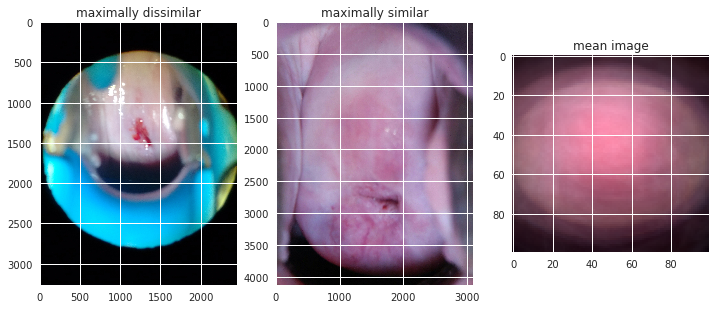

In [13]:
# upper triangle of matrix set to np.nan
sq_dists[np.triu_indices_from(mask)] = np.nan
sq_dists[0, 0] = np.nan

fig = plt.figure(figsize=(12,8))
# maximally dissimilar image
ax = fig.add_subplot(1,3,1)
maximally_dissimilar_image_idx = np.nanargmax(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_dissimilar_image_idx])
plt.title('maximally dissimilar')

# maximally similar image
ax = fig.add_subplot(1,3,2)
maximally_similar_image_idx = np.nanargmin(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_similar_image_idx])
plt.title('maximally similar')

# now compute the mean image
ax = fig.add_subplot(1,3,3)
mean_img = gray_imgs_mat.mean(axis=0).reshape(rescaled_dim, rescaled_dim, 3)
plt.imshow(cv2.normalize(mean_img, None, 0.0, 1.0, cv2.NORM_MINMAX))
plt.title('mean image')

# Setting up validation set

In [14]:
%pwd

'/home/paperspace/Repos/Cervical_Cancer_Comp'

In [15]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/'

In [16]:
import matplotlib
%matplotlib inline

In [17]:
%cd $DATA_HOME_DIR

/home/paperspace/Repos/Cervical_Cancer_Comp/data


In [18]:
%mkdir valid
%cd valid
%mkdir Type_1
%mkdir Type_2
%mkdir Type_3

/home/paperspace/Repos/Cervical_Cancer_Comp/data/valid


In [19]:
%cd $DATA_HOME_DIR/train

/home/paperspace/Repos/Cervical_Cancer_Comp/data/train


In [20]:
from glob import glob

In [21]:
%pwd

'/home/paperspace/Repos/Cervical_Cancer_Comp/data/train'

In [22]:
g = glob('**/*.jpg')
shuf = np.random.permutation(g)
print(shuf)
for i in range(355): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

['Type_3/207.jpg' 'Type_3/1221.jpg' 'Type_2/903.jpg' ..., 'Type_3/689.jpg'
 'Type_2/1196.jpg' 'Type_2/1172.jpg']


# Building the model

In [41]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers
from keras import regularizers
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical

import csv
import numpy as np
import PIL

In [26]:
validation_data_dir = DATA_HOME_DIR+'/valid'
train_data_dir = DATA_HOME_DIR+'train'

In [60]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [61]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(x)
# and a logistic layer -- let's say we have 200 classes
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

In [62]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [63]:
def printAllLayers():
    for i, layer in enumerate(model.layers):
       print(i, layer.name)

In [64]:
def printTrainableLayers():
    for i, layer in enumerate(model.layers):
       if layer.trainable == True: 
           print(i, layer.name)

In [65]:
# set the first 311 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:311]:
    layer.trainable = False

In [66]:
printTrainableLayers()

311 global_average_pooling2d_2
312 dense_4
313 dropout_3
314 dense_5
315 dropout_4
316 dense_6


In [67]:
opt = Adam(lr=1e-5)
#opt = SGD(lr=1e-2, momentum=0.9, decay=0.01, nesterov=True)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
filepath="../inception-top-weights-droput-50-2-improvement-{epoch:02d}-{val_loss:}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
tbCallBack = TensorBoard(log_dir='./graph_incep_top_dropout_50_3', histogram_freq=0, write_graph=True, write_images=True)
callbacks_list.append(tbCallBack)

In [76]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [77]:
batch_size = 16
nb_classes = 3
img_height = 299 
img_width = 299
nb_train_samples = 1126

In [78]:
train_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1. / 255,
        zoom_range=0.2,
        fill_mode='nearest')

In [79]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1126 images belonging to 3 classes.


In [80]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 355 images belonging to 3 classes.


In [82]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=355 // batch_size,
        callbacks=callbacks_list)

Epoch 1/40
69/70 [============================>.] - ETA: 3s - loss: 1.3068 - categorical_accuracy: 0.4396

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anacond

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 520880128 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 11090. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 21488365096 bytes but only got 0. Skipping tag 40486
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 745734144 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/

/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 546963456 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 11488. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 621150208 bytes but only got 0. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/paperspace/anaconda3/envs/yolo/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 205914112 bytes but only got 12620. Skipping tag 4
  "Skipping tag %s" % (size, len(data), tag))
/home/pa

Epoch 00000: val_loss improved from inf to 1.07347, saving model to ../inception-top-weights-droput-50-2-improvement-00-1.073472572998567.hdf5
70/70 [==============================] - 333s - loss: 1.3055 - categorical_accuracy: 0.4396 - val_loss: 1.0735 - val_categorical_accuracy: 0.3239
Epoch 2/40
70/70 [==============================] - 294s - loss: 1.1191 - categorical_accuracy: 0.4646 - val_loss: 1.0372 - val_categorical_accuracy: 0.5085
Epoch 3/40
70/70 [==============================] - 289s - loss: 1.0655 - categorical_accuracy: 0.5262 - val_loss: 1.0173 - val_categorical_accuracy: 0.4403
Epoch 4/40
70/70 [==============================] - 289s - loss: 1.0613 - categorical_accuracy: 0.5113 - val_loss: 1.0196 - val_categorical_accuracy: 0.5057
Epoch 5/40
70/70 [==============================] - 288s - loss: 1.0383 - categorical_accuracy: 0.5113 - val_loss: 1.0287 - val_categorical_accuracy: 0.5114
Epoch 6/40
70/70 [==============================] - 289s - loss: 1.0227 - categoric

70/70 [==============================] - 291s - loss: 0.9386 - categorical_accuracy: 0.5610 - val_loss: 0.9062 - val_categorical_accuracy: 0.5938
Epoch 26/40
70/70 [==============================] - 292s - loss: 0.9390 - categorical_accuracy: 0.5506 - val_loss: 0.9038 - val_categorical_accuracy: 0.5938
Epoch 27/40
70/70 [==============================] - 287s - loss: 0.9149 - categorical_accuracy: 0.5613 - val_loss: 0.9115 - val_categorical_accuracy: 0.5966
Epoch 28/40
70/70 [==============================] - 291s - loss: 0.9377 - categorical_accuracy: 0.5545 - val_loss: 0.9307 - val_categorical_accuracy: 0.5881
Epoch 29/40
70/70 [==============================] - 290s - loss: 0.9217 - categorical_accuracy: 0.5714 - val_loss: 0.8882 - val_categorical_accuracy: 0.6023
Epoch 30/40
70/70 [==============================] - 288s - loss: 0.9356 - categorical_accuracy: 0.5679 - val_loss: 0.9155 - val_categorical_accuracy: 0.5682
Epoch 31/40
70/70 [==============================] - 292s - loss

In [ ]:
model = model_from_json(loaded_model_json)
model.load_weights("good_run/inception-top-weights-droput-50-2-improvement-36-0.902600862763.hdf5")